## 1.5 Upscaling EOBS then Masking


This notebook builds onto [1.4 Masking](1.4Mask.ipynb), by upscaling EOBS to the SEAS5 grid. We regrid EOBS to the SEAS5 grid so we can select the same grid cells in calculating the UK average for both datasets. The country outline would not be perfect, but the masks would be the same so the comparison would be fair. 

I use the [xesmf package](https://xesmf.readthedocs.io/en/latest/) for upscaling, a good example can be found in this [notebook](https://nbviewer.jupyter.org/github/geoschem/GEOSChem-python-tutorial/blob/master/Chapter03_regridding.ipynb). 

### Import packages



In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
##import packages
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

import pandas as pd

In [3]:
##We want the working directory to be the UNSEEN-open directory
pwd = os.getcwd() ##current working directory is UNSEEN-open/Notebooks/1.Download
pwd #print the present working directory

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-trends/Mining'

In [4]:
os.chdir(pwd+'/../') # Change the working directory to UNSEEN-trends
os.getcwd() #print the working directory

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-trends'

## Load SEAS5 ERA5 and EOBS


We retrieve EOBS and ERA5. Then we have to check whether they have to be upscaled to the same grid. Finally, extract the region based on the domain + SEAS5 quantiles.





<xarray.Dataset>
Dimensions:  (lat: 100, lon: 141)
Coordinates:
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 34.0 34.25 34.5 34.75 35.0
  * lat      (lat) float64 57.12 57.38 57.62 57.88 ... 81.12 81.38 81.62 81.88
Data variables:
    P_200    (lat, lon) float32 ...

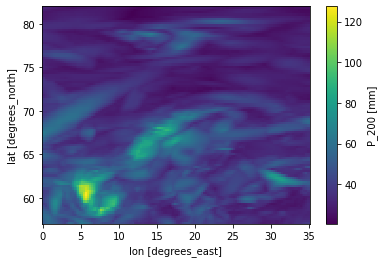

In [5]:
SEAS5_q200 = xr.open_dataset('../UNSEEN-trends_play/Quantiles200.nc')
SEAS5_q200

SEAS5_q200['P_200'].plot()



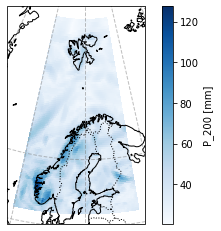

In [8]:
mapproj = ccrs.LambertConformal(central_longitude=20.0,
                                central_latitude=65.0,
                                false_easting=0.0,
                                false_northing=0.0,
                                secant_latitudes=None,
                                standard_parallels=None,
                                globe=None,
                                cutoff=-30)

ax = plt.axes(projection=mapproj)

SEAS5_q200['P_200'].plot(transform=ccrs.PlateCarree(),
#                          robust=True,
                         cmap=plt.cm.Blues,
                         ax=ax)

ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=False,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')
gl.ylocator = mticker.FixedLocator([35, 45, 55, 65])

# ax.set_title('February 2020')